# Importing libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

# Importing the dataset

In [2]:
data = pd.read_csv('Language Detection.csv')

In [3]:
data.iloc[:, 1].value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

In [4]:
# Separating Independent and Dependent features
X = data.iloc[:, 0].values
y = data.iloc[:, 1].values

# Label Encoding

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Text Processing

In [6]:
# creating a list for appending the preprocessed text
data_list = []
# iterating through all the text
for text in X:
       # removing the symbols and numbers
        text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
        text = re.sub(r'[[]]', ' ', text)
        # converting the text to lower case
        text = text.lower()
        # appending to data_list
        data_list.append(text)

# Bag of Words

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray()
X.shape # (10337, 39419)

(10337, 34937)

# Splitting the data in train and test

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# Model Training and Prediction

In [9]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [10]:
y_pred = model.predict(x_test)

# Evaluating the model

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy is :",ac * 100)

Accuracy is : 97.5338491295938


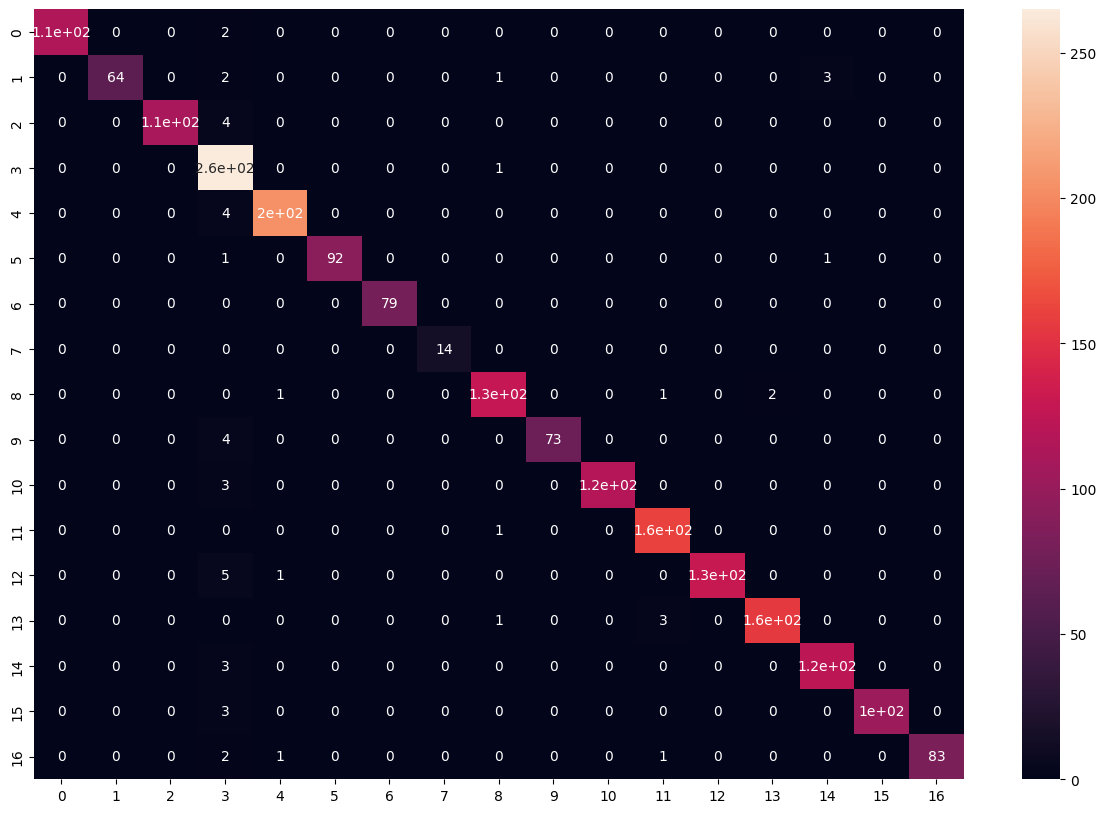

In [12]:
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

# Function To predict Language of new data

In [13]:
def predict(text):
     x = cv.transform([text]).toarray() # converting text to bag of words model (Vector)
     lang = model.predict(x) # predicting the language
     lang = le.inverse_transform(lang) # finding the language corresponding the the predicted value
     print("The langauge is in",lang[0]) # printing the language

In [14]:
# English
predict("Analytics Vidhya provides a community based knowledge portal for Analytics and Data Science professionals")

The langauge is in English


In [15]:
# French
predict("Analytics Vidhya fournit un portail de connaissances basé sur la communauté pour les professionnels de l'analyse et de la science des données")

The langauge is in French


In [16]:
# Arabic
predict("توفر Analytics Vidhya بوابة معرفية قائمة على المجتمع لمحترفي التحليلات وعلوم البيانات")

The langauge is in Arabic


In [17]:
# Spanish
predict("Analytics Vidhya proporciona un portal de conocimiento basado en la comunidad para profesionales de Analytics y Data Science.")

The langauge is in Spanish


In [18]:
# Malayalam
predict("അനലിറ്റിക്സ്, ഡാറ്റാ സയൻസ് പ്രൊഫഷണലുകൾക്കായി കമ്മ്യൂണിറ്റി അധിഷ്ഠിത വിജ്ഞാന പോർട്ടൽ അനലിറ്റിക്സ് വിദ്യ നൽകുന്നു")

The langauge is in Malayalam


In [19]:
# Russian
predict("Analytics Vidhya - это портал знаний на базе сообщества для профессионалов в области аналитики и данных.")

The langauge is in Russian


In [25]:
# Kannada
predict("ನನ್ನ ಹೆಸರು ಹರ್ಸಿಮ್ರಾನ್")

The langauge is in Kannada


In [29]:
# Hindi
predict("विवेक दिसंबर में वापिस आएगा न? मुझे उसके हर रोज़ सपने आते है ")

The langauge is in Hindi
